 # <font color=Black> <center>Thera Bank Personal Loan Campaign </center> </font>


### <font color=Blue> Importing the libraries </font>


In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(color_codes=True)
sns.set_style(style='darkgrid') #Update default background style of plots

pd.options.display.float_format = '{:,.2f}'.format #Display all numbers with 2 decimal points


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

In [114]:
#Importing data and storing into dataframe
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

df.head(2)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0


In [115]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [116]:
df.info()
#Dataset has 5000 rows & all field Not NULL values are 5000. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [117]:
df.shape

(5000, 14)

In [118]:
# No NULL values in data
df.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [119]:
df.describe().transpose()
# Experience has negative value, which is incorrect

,count,mean,std,min,25%,50%,75%,max
ID,"5,000.00","2,500.50","1,443.52",1.00,"1,250.75","2,500.50","3,750.25","5,000.00"
Age,"5,000.00",45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,"5,000.00",20.10,11.47,-3.00,10.00,20.00,30.00,43.00
Income,"5,000.00",73.77,46.03,8.00,39.00,64.00,98.00,224.00
ZIP Code,"5,000.00","93,152.50","2,121.85","9,307.00","91,911.00","93,437.00","94,608.00","96,651.00"
Family,"5,000.00",2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,"5,000.00",1.94,1.75,0.00,0.70,1.50,2.50,10.00
Education,"5,000.00",1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,"5,000.00",56.50,101.71,0.00,0.00,0.00,101.00,635.00
Personal Loan,"5,000.00",0.10,0.29,0.00,0.00,0.00,0.00,1.00


In [120]:
#Incorrect imputation
#Number of records with Negative Experience are invalid. 
#Records with 0 experience is considered Valid, assuming experience is of few months. 
print("Number of records with Invalid Experience : ",len(df[df['Experience']<0]))

print("\nInvalid experience values are : ",df[df['Experience']<0]['Experience'].unique())

Number of records with Invalid Experience :  52

Invalid experience values are :  [-1 -2 -3]


In [121]:
#Replacing negative experience with Median
df['Experience'].replace({-1:df['Experience'].median(),-2:df['Experience'].median(),-3:df['Experience'].median()},inplace=True)


In [122]:
# New mean
df['Experience'].mean()

20.3276

In [123]:
#Number of unique in each column
for i in df.columns:
    print("Number of Unique Values for column {0} is : {1}".format(i,df[i].nunique()))

Number of Unique Values for column ID is : 5000
Number of Unique Values for column Age is : 45
Number of Unique Values for column Experience is : 44
Number of Unique Values for column Income is : 162
Number of Unique Values for column ZIP Code is : 467
Number of Unique Values for column Family is : 4
Number of Unique Values for column CCAvg is : 108
Number of Unique Values for column Education is : 3
Number of Unique Values for column Mortgage is : 347
Number of Unique Values for column Personal Loan is : 2
Number of Unique Values for column Securities Account is : 2
Number of Unique Values for column CD Account is : 2
Number of Unique Values for column Online is : 2
Number of Unique Values for column CreditCard is : 2


In [124]:
#Number of people with zero mortgage
print ("Number of people with zero mortgage is : ", len(df[df['Mortgage']==0]))
print ("Percent of people with zero mortgage is : ",len(df[df['Mortgage']==0])/len(df['ID'])*100,"%")

Number of people with zero mortgage is :  3462
Percent of people with zero mortgage is :  69.24 %


In [125]:
#Number of people with zero credit card spending per month
print ("Number of people with zero credit card spending per month is : ",len(df[df['CCAvg']==0]))
print ("Percent of people with zero credit card spending per month is : ",len(df[df['CCAvg']==0])/len(df['ID'])*100,"%")

Number of people with zero credit card spending per month is :  106
Percent of people with zero credit card spending per month is :  2.12 %


In [131]:
#Value counts of all categorical columns
for i in ['Family','Education','Personal Loan', 'Securities Account', 'CD Account', 'Online','CreditCard']:
    print("------------------------------------")
    print (i,"Value Counts is -")
    print(df[i].value_counts(normalize=True))

------------------------------------
Family Value Counts is -
1   0.29
2   0.26
4   0.24
3   0.20
Name: Family, dtype: float64
------------------------------------
Education Value Counts is -
1   0.42
3   0.30
2   0.28
Name: Education, dtype: float64
------------------------------------
Personal Loan Value Counts is -
0   0.90
1   0.10
Name: Personal Loan, dtype: float64
------------------------------------
Securities Account Value Counts is -
0   0.90
1   0.10
Name: Securities Account, dtype: float64
------------------------------------
CD Account Value Counts is -
0   0.94
1   0.06
Name: CD Account, dtype: float64
------------------------------------
Online Value Counts is -
1   0.60
0   0.40
Name: Online, dtype: float64
------------------------------------
CreditCard Value Counts is -
0   0.71
1   0.29
Name: CreditCard, dtype: float64


### Since ID column is unique for every record and not adding value to model, we will drop it


In [132]:
df.drop('ID',axis=1,inplace=True)

### Analysing ZIP Code field

In [134]:
df['ZIP Code'].value_counts(normalize=True)

94720   0.03
94305   0.03
95616   0.02
90095   0.01
93106   0.01
        ... 
96145   0.00
94970   0.00
94598   0.00
90068   0.00
94087   0.00
Name: ZIP Code, Length: 467, dtype: float64

In [136]:
#Dropping field ZIP Code since this doesnt seem to add much value to Loans
df.drop('ZIP Code',axis=1,inplace=True)

### Univariate Analysis & Plots

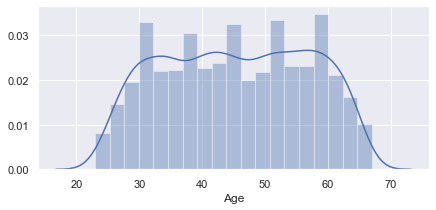

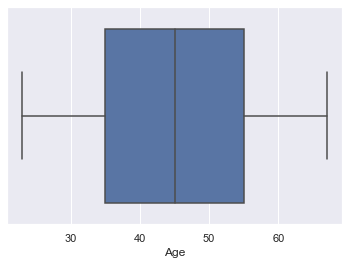

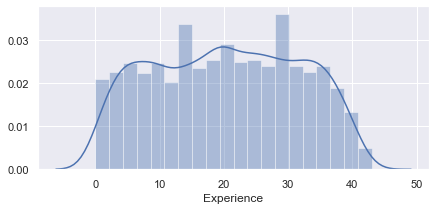

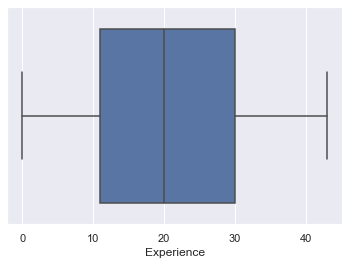

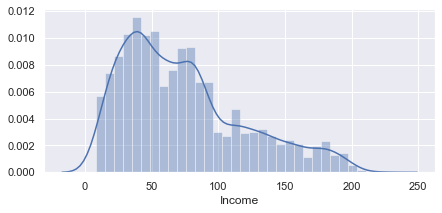

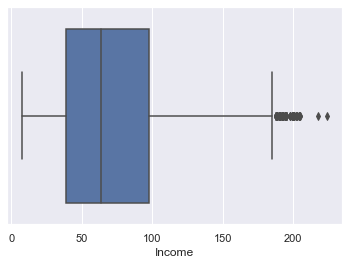

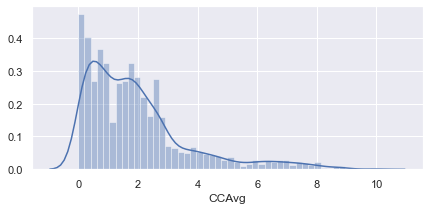

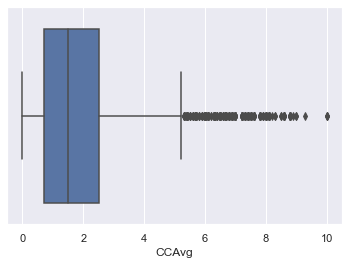

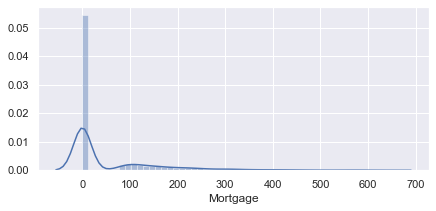

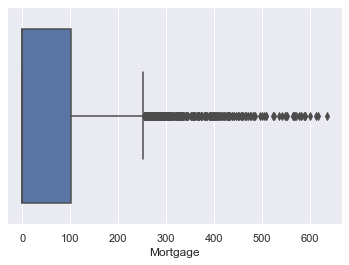

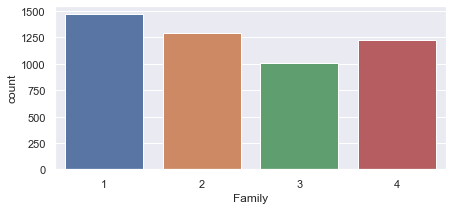

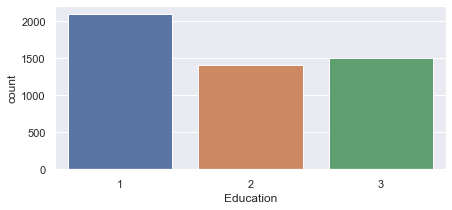

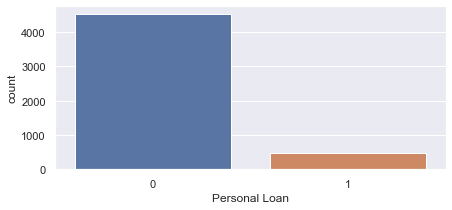

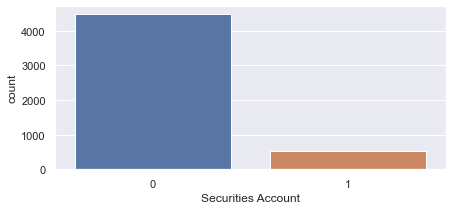

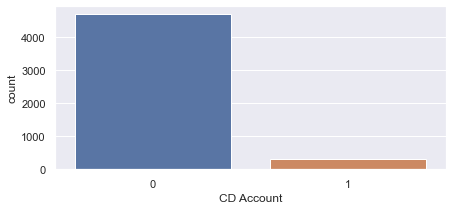

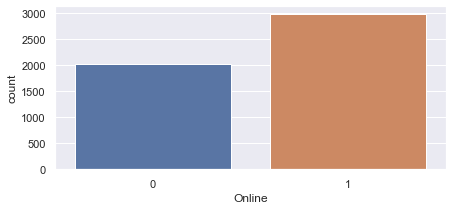

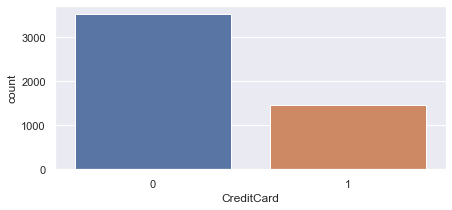

In [139]:
for i in ['Age','Experience','Income','CCAvg','Mortgage']:
    plt.figure(figsize = (7,3))
    sns.distplot(df[i])
    plt.show()
    sns.boxplot(df[i])
    plt.show()
for i in ['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']:
    plt.figure(figsize = (7,3))
    sns.countplot(df[i])
    plt.show()
    

### Bivariate/Multivariate Analysis & Plots

In [140]:
df.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.00,0.98,-0.06,-0.05,-0.05,0.04,-0.01,-0.01,-0.00,0.01,0.01,0.01
Experience,0.98,1.00,-0.05,-0.05,-0.05,0.02,-0.01,-0.01,-0.00,0.01,0.01,0.01
Income,-0.06,-0.05,1.00,-0.16,0.65,-0.19,0.21,0.50,-0.00,0.17,0.01,-0.00
Family,-0.05,-0.05,-0.16,1.00,-0.11,0.06,-0.02,0.06,0.02,0.01,0.01,0.01
CCAvg,-0.05,-0.05,0.65,-0.11,1.00,-0.14,0.11,0.37,0.02,0.14,-0.00,-0.01
Education,0.04,0.02,-0.19,0.06,-0.14,1.00,-0.03,0.14,-0.01,0.01,-0.02,-0.01
Mortgage,-0.01,-0.01,0.21,-0.02,0.11,-0.03,1.00,0.14,-0.01,0.09,-0.01,-0.01
Personal Loan,-0.01,-0.01,0.50,0.06,0.37,0.14,0.14,1.00,0.02,0.32,0.01,0.00
Securities Account,-0.00,-0.00,-0.00,0.02,0.02,-0.01,-0.01,0.02,1.00,0.32,0.01,-0.02
CD Account,0.01,0.01,0.17,0.01,0.14,0.01,0.09,0.32,0.32,1.00,0.18,0.28


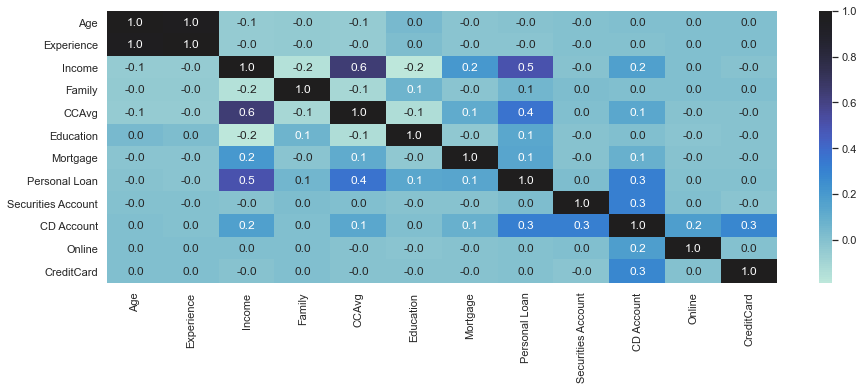

In [142]:
fig,ax=plt.subplots(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,center=1,fmt='0.1f');

### Inference from Correlation Heat Map -
- Personal Loan had correlation with Income, Avg CC Spending, CD Account holders. 
- Personal loan also seems to be slightly dependent on Family size, Education level & Value of House Mortgage.
- Personal loan has no relation with Age, Years of Experience, Securities Account, Online or Internet Banking & Credit Card issued by bank


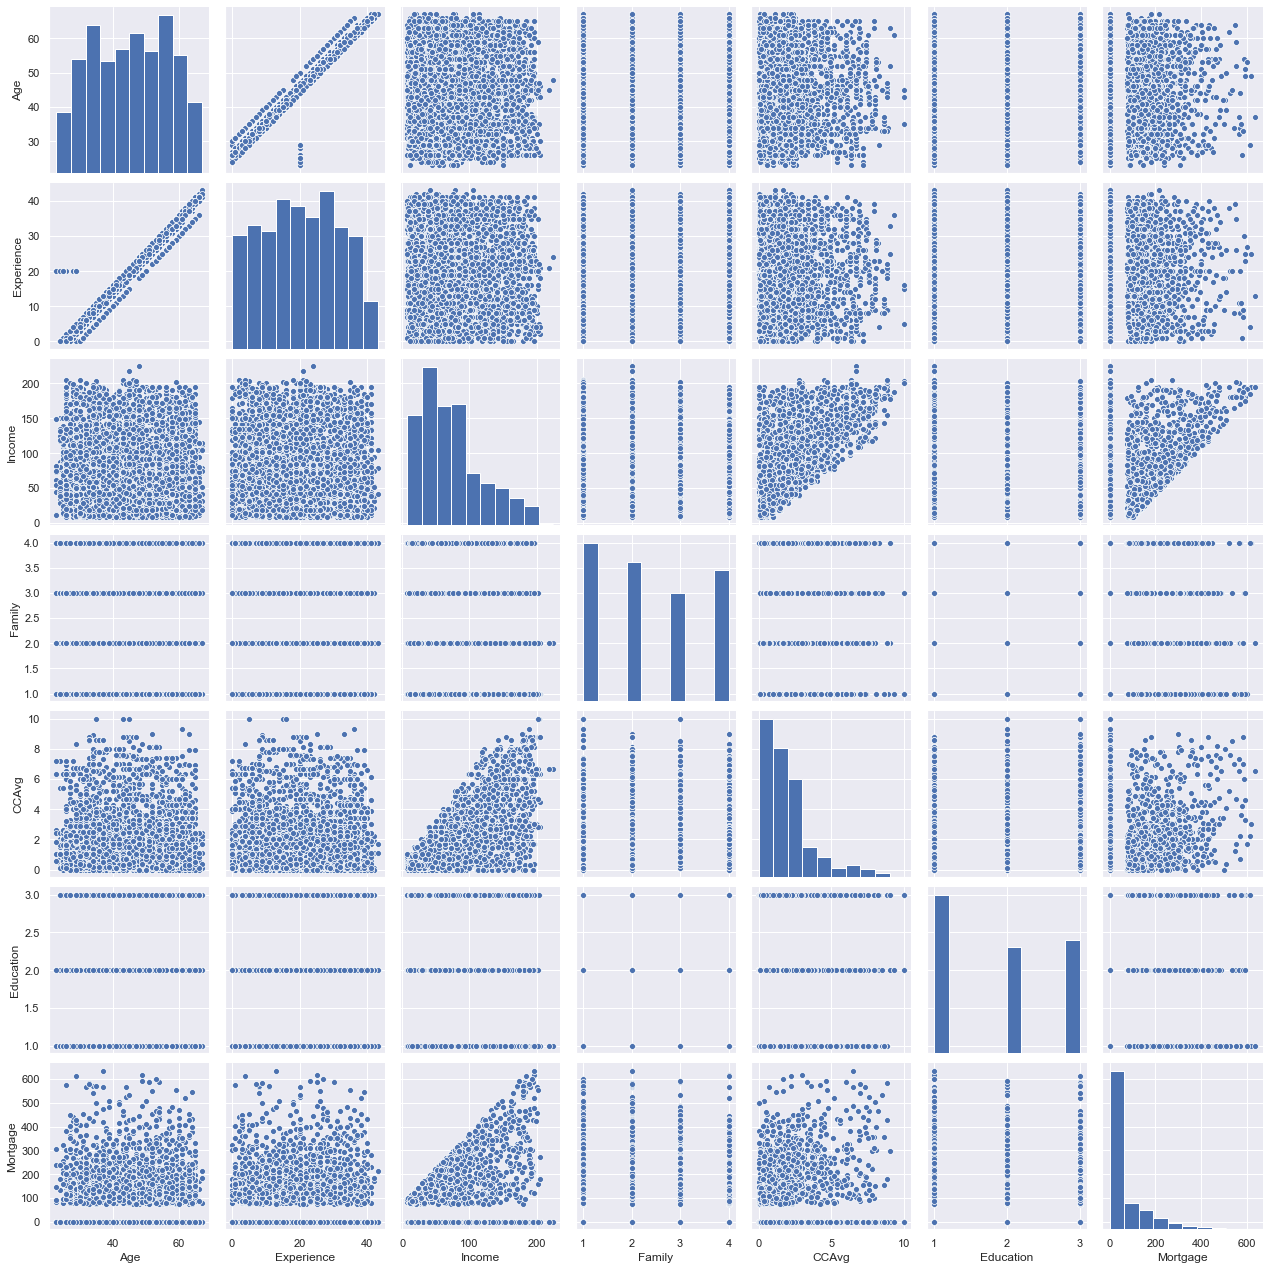

In [143]:
sns.pairplot(df.loc[:,list(df.columns[0:7])]);

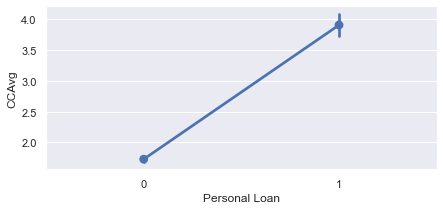

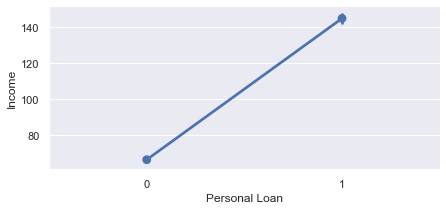

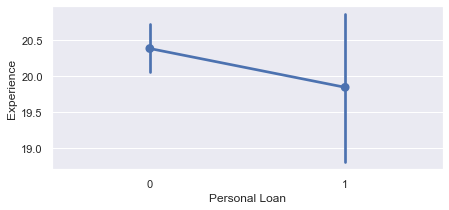

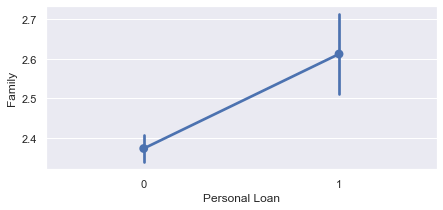

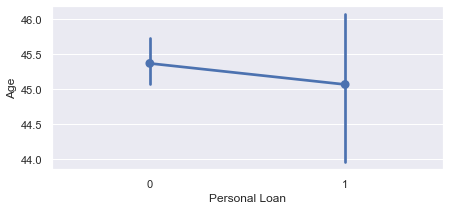

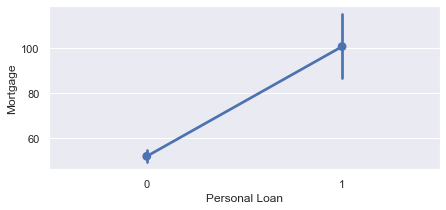

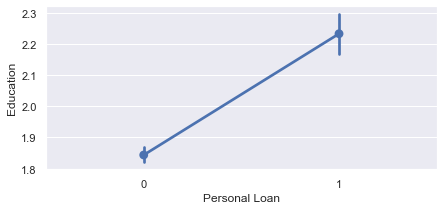

In [57]:
for i in ['CCAvg','Income','Experience','Family','Age','Mortgage','Education']:
    fig,ax=plt.subplots(figsize=(7,3))
    sns.pointplot(df['Personal Loan'],df[i])
    plt.show()

In [71]:
print(df.groupby(["Personal Loan"]).mean()['CCAvg'],"\n")
print(df.groupby(["Personal Loan"]).mean()['Income'],"\n")
print(df.groupby(["Personal Loan"]).mean()['Experience'],"\n")

Personal Loan
0   1.73
1   3.91
Name: CCAvg, dtype: float64 

Personal Loan
0    66.24
1   144.75
Name: Income, dtype: float64 

Personal Loan
0   20.38
1   19.84
Name: Experience, dtype: float64 



In [73]:
print(df.groupby(["Personal Loan"]).median()['CCAvg'],"\n")
print(df.groupby(["Personal Loan"]).median()['Income'],"\n")
print(df.groupby(["Personal Loan"]).median()['Experience'],"\n")

Personal Loan
0   1.40
1   3.80
Name: CCAvg, dtype: float64 

Personal Loan
0    59.00
1   142.50
Name: Income, dtype: float64 

Personal Loan
0   20.00
1   20.00
Name: Experience, dtype: float64 



### Inference

- People with higher income & Average Credit card spendings, tends to take Personal Loan
- Experience has no significant impact on Personal Loan

In [77]:
pd.crosstab(df['CreditCard'],df['Personal Loan'],normalize='index')

Personal Loan,0,1
CreditCard,,
0,0.90,0.10
1,0.90,0.10


In [80]:
pd.crosstab(df['Online'],df['Personal Loan'],normalize='index')

Personal Loan,0,1
Online,,
0,0.91,0.09
1,0.90,0.10


In [81]:
pd.crosstab(df['CD Account'],df['Personal Loan'],normalize='index')

Personal Loan,0,1
CD Account,,
0,0.93,0.07
1,0.54,0.46


In [83]:
pd.crosstab(df['Securities Account'],df['Personal Loan'],normalize='index')

Personal Loan,0,1
Securities Account,,
0,0.91,0.09
1,0.89,0.11


In [85]:
pd.crosstab(df['Education'],df['Personal Loan'],normalize='index')

Personal Loan,0,1
Education,,
1,0.96,0.04
2,0.87,0.13
3,0.86,0.14


In [144]:
pd.crosstab(df['Family'],df['Personal Loan'],normalize='index')

Personal Loan,0,1
Family,,
1,0.93,0.07
2,0.92,0.08
3,0.87,0.13
4,0.89,0.11


### <font color=Blue> Getting the Model Ready</font>

In [145]:
# Converting Categorical variables to dummy variables
df1 = pd.get_dummies(df, columns=['Education'])

In [146]:
print(df1.columns)

df1.head(3)

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Education_1', 'Education_2', 'Education_3'],
      dtype='object')


,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,25,1.00,49,4,1.60,0,0,1,0,0,0,1,0,0
1,45,19.00,34,3,1.50,0,0,1,0,0,0,1,0,0
2,39,15.00,11,1,1.00,0,0,0,0,0,0,1,0,0


In [147]:
df2 = pd.get_dummies(df1, columns=['Family'])

In [150]:
print(df2.columns)

df2.head(3)

Index(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Personal Loan',
       'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'Education_1', 'Education_2', 'Education_3', 'Family_1', 'Family_2',
       'Family_3', 'Family_4'],
      dtype='object')


,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3,Family_1,Family_2,Family_3,Family_4
0,25,1.00,49,1.60,0,0,1,0,0,0,1,0,0,0,0,0,1
1,45,19.00,34,1.50,0,0,1,0,0,0,1,0,0,0,0,1,0
2,39,15.00,11,1.00,0,0,0,0,0,0,1,0,0,1,0,0,0


### Splitting into Train & Test dataset

In [176]:
x = df2.drop(['Personal Loan'],axis=1)
y = df2['Personal Loan']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=1)

### Applying Logistic Regression Model

In [177]:
regression_model = LogisticRegression(solver='liblinear')
regression_model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [178]:
y_predict=regression_model.predict(x_test)

In [179]:
print( 'Training Accuracy : ',np.round(regression_model.score(x_train,y_train), 2) )

print( 'Testing Accuracy : ',np.round(regression_model.score(x_test,y_test), 2) )

print( 'Recall : ',np.round(metrics.recall_score(y_test, y_predict), 2) )

print( 'Precision : ',np.round(metrics.precision_score(y_test, y_predict), 2) )

print( 'F1 Score : ',np.round(metrics.f1_score(y_test, y_predict), 2) )

print( 'ROC_AUC Score : ',np.round(metrics.roc_auc_score(y_test, y_predict), 2) )

Training Accuracy :  0.96
Testing Accuracy :  0.95
Recall :  0.6
Precision :  0.9
F1 Score :  0.72
ROC_AUC Score :  0.79


In [180]:
#Confusion Matrix
cm = metrics.confusion_matrix(y_test,y_predict,labels=[1,0])
print(cm)

[[  89   60]
 [  10 1341]]


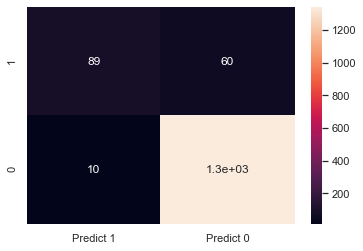

In [181]:
#Confusion Matrix heatmap
df_cm = pd.DataFrame(cm,index = [i for i in ["1","0"]],
                     columns = [i for i in ["Predict 1","Predict 0"]])
df_cm
sns.heatmap(df_cm, annot=True);

In [192]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = x_train.columns
fi['Coeff'] = np.round(regression_model.coef_[0],2)
fi['Coeff_absolute'] = np.round(abs(regression_model.coef_[0]),2)
fi.sort_values(by='Coeff_absolute',ascending=False)

,Col,Coeff,Coeff_absolute
9,Education_1,-3.77,3.77
6,CD Account,3.07,3.07
12,Family_1,-1.93,1.93
13,Family_2,-1.93,1.93
8,CreditCard,-0.85,0.85
5,Securities Account,-0.77,0.77
15,Family_4,-0.58,0.58
7,Online,-0.56,0.56
10,Education_2,-0.35,0.35
3,CCAvg,0.21,0.21


In [186]:
z = x_test.copy()
z.head(2)

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3,Family_1,Family_2,Family_3,Family_4
2764,31,5.00,84,2.90,105,0,0,0,1,0,0,1,1,0,0,0
4767,35,9.00,45,0.90,101,1,0,0,0,1,0,0,0,0,1,0


In [187]:
z['Actual_PL'] = y_test.values                                      # Storing actual output of target variable

z['Probaility_Out_0'] = regression_model.predict_proba(x_test)[:,0]
# Probabilities predicted by Logistic regression model
z['Probaility_Out_1'] = regression_model.predict_proba(x_test)[:,1]

z['Predicted_PL'] = regression_model.predict(x_test)                               # Predicting target variable using sklearn Logistic regression

z.head()

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3,Family_1,Family_2,Family_3,Family_4,Actual_PL,Probaility_Out_0,Probaility_Out_1,Predicted_PL
2764,31,5.00,84,2.90,105,0,0,0,1,0,0,1,1,0,0,0,0,0.97,0.03,0
4767,35,9.00,45,0.90,101,1,0,0,0,1,0,0,0,0,1,0,0,1.00,0.00,0
3814,34,9.00,35,1.30,0,0,0,0,0,1,0,0,0,0,1,0,0,1.00,0.00,0
3499,49,23.00,114,0.30,286,0,0,1,0,1,0,0,1,0,0,0,0,1.00,0.00,0
2735,36,12.00,70,2.60,165,0,0,1,0,0,1,0,0,0,1,0,0,0.88,0.12,0


In [190]:
# The rows where the predicted class is not equal to the observed class.
z[z['Actual_PL']!=z['Predicted_PL']].head()

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3,Family_1,Family_2,Family_3,Family_4,Actual_PL,Probaility_Out_0,Probaility_Out_1,Predicted_PL
932,51,27.00,112,1.80,0,1,1,1,1,0,1,0,0,0,1,0,0,0.21,0.79,1
3347,65,41.00,78,2.00,0,0,1,1,1,0,0,1,0,0,1,0,0,0.39,0.61,1
3988,59,35.00,85,3.40,0,0,1,0,1,0,0,1,1,0,0,0,1,0.59,0.41,0
3271,52,27.00,93,4.10,0,0,0,0,1,0,1,0,0,0,0,1,1,0.85,0.15,0
349,26,2.00,60,3.00,132,0,0,0,0,1,0,0,0,1,0,0,1,1.00,0.00,0


### Business Insights

**Important Features**

"Education_1", "CD Account", "Family_1", "Family_2", "CreditCard", "Securities Account" 
seems to be top 6 features which influence the model's output, based on the coefficients value.


"Mortgage", "Income", "Experience" and "Age"
have coefficients value as nearly 0, so these feature doesn't help model in predicting target variable.